In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


# **EDA**

In [7]:
df["age"] = df["age"].astype(int)

In [8]:
df.isna().sum().any()

False

In [9]:
df.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                     44
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [10]:
col = ["age","annual Salary","credit card debt","net worth","car purchase amount"]

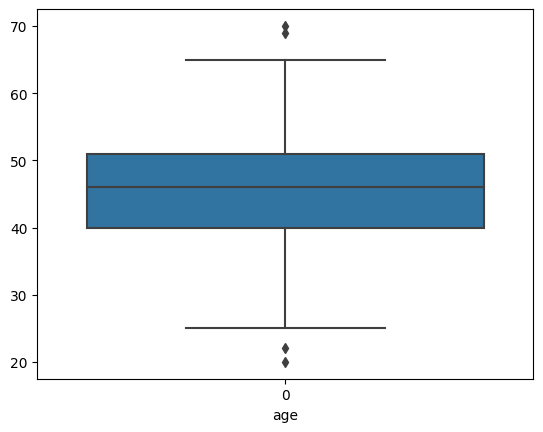

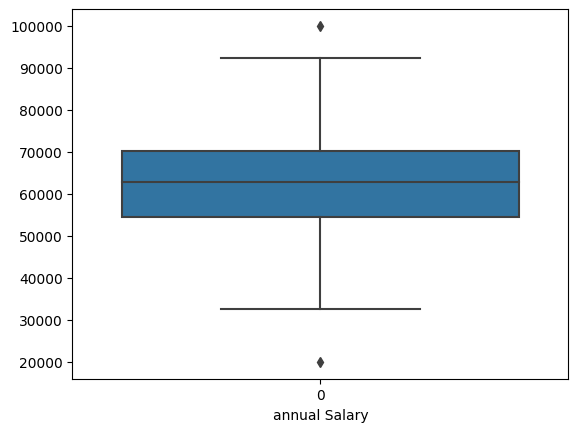

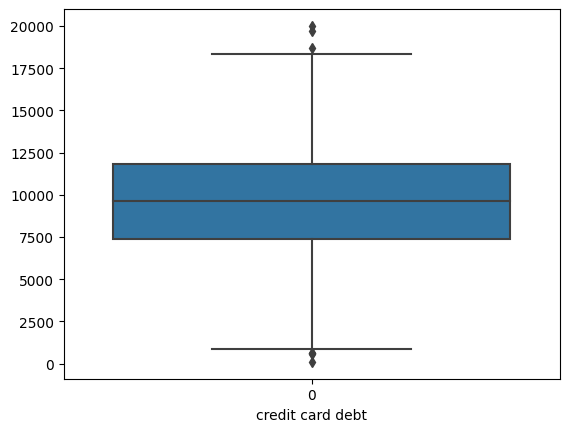

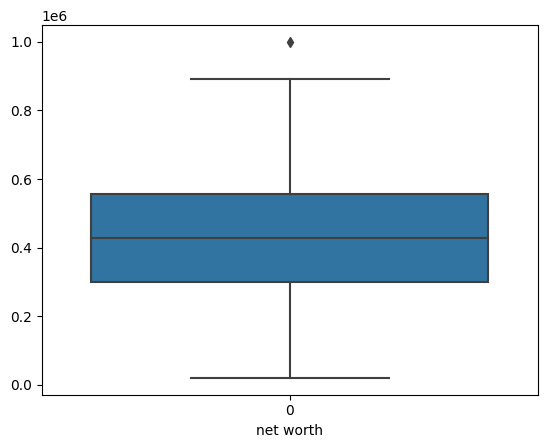

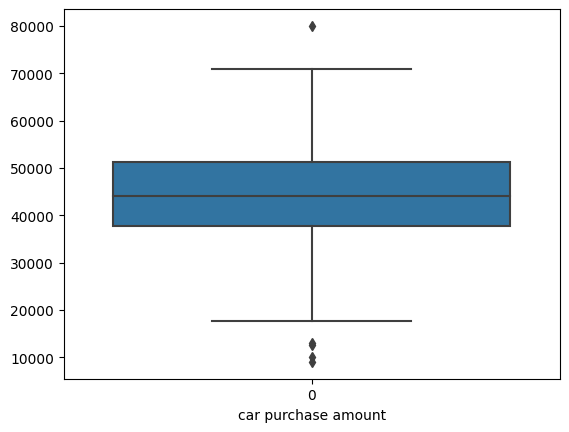

In [11]:
for i in col:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()
    print()

# Handling Outliers

In [12]:
data = df.copy()

In [13]:
data.drop(columns = ["customer name" , "customer e-mail" , "country"], axis = 1 , inplace = True)

In [14]:
percentile25 = []
percentile75 = []

In [15]:
for i in col:
    percentile25.append(data[i].quantile(0.25))
    percentile75.append(data[i].quantile(0.75))

In [16]:
print(percentile25)
print(percentile75)

[40.0, 54391.977195, 7397.51579175, 299824.19590000005, 37629.89604]
[51.0, 70117.862005, 11798.8674875, 557324.478725, 51254.7095175]


In [17]:
lower_limit = []
upper_limit = []
iqr = []
    
for i in range(len(col)):
        iqr.append((percentile75[i] - percentile25[i]))
        lower_limit.append(percentile25[i] - 1.5 * iqr[i])
        upper_limit.append(percentile75[i] + 1.5 * iqr[i])

In [18]:
print(iqr)
print(lower_limit)
print(upper_limit)

[11.0, 15725.884810000003, 4401.35169575, 257500.282825, 13624.8134775]
[23.5, 30803.149979999995, 795.4882481250006, -86426.22833749995, 17192.67582375]
[67.5, 93706.68922, 18400.895031125, 943574.9029625, 71691.92973375]


In [19]:
j = 0
for i in col:
    data[i] = np.where(
    data[i] > upper_limit[j],
    upper_limit[j] ,
    np.where(data[i] < lower_limit[j],
             lower_limit[j],
             data[i]
            )
       )
    j = j+1

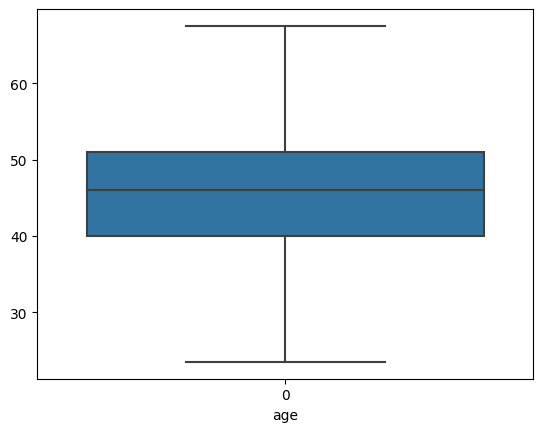

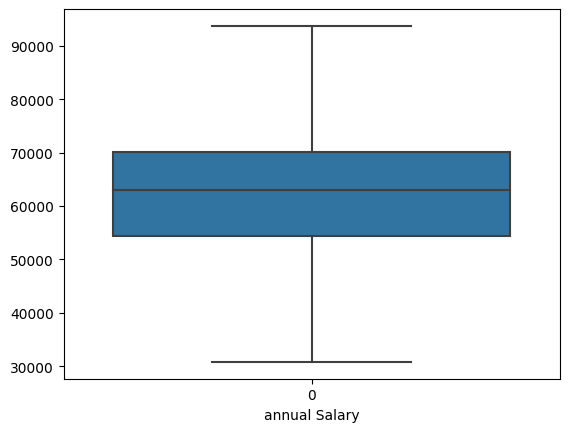

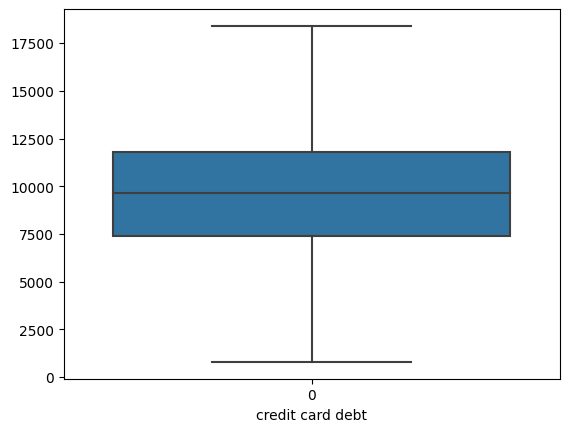

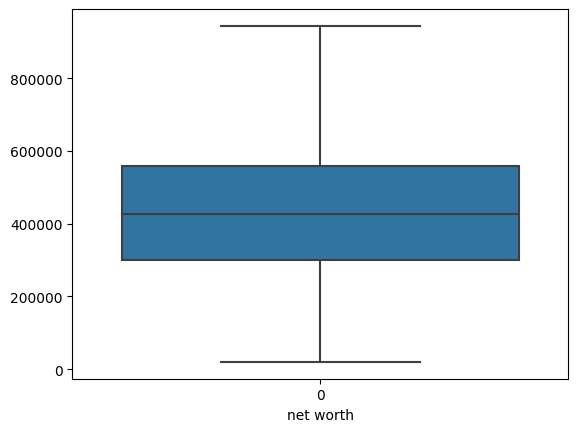

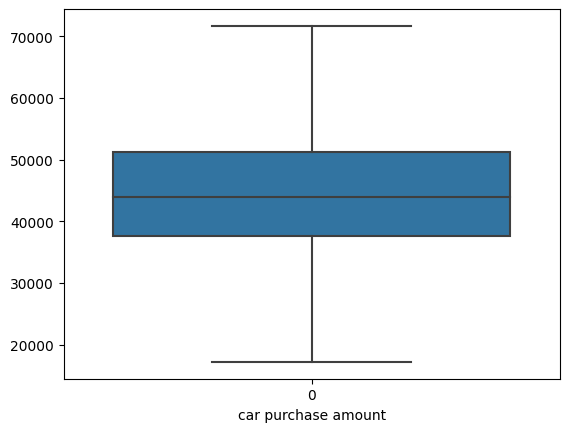

In [20]:
for i in col:
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.show()
    print("\n\n")

# Data Visualization

<Axes: ylabel='count'>

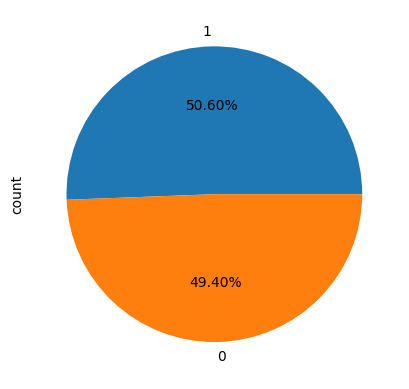

In [21]:
data["gender"].value_counts().plot(kind = "pie" , autopct = "%0.2f%%")

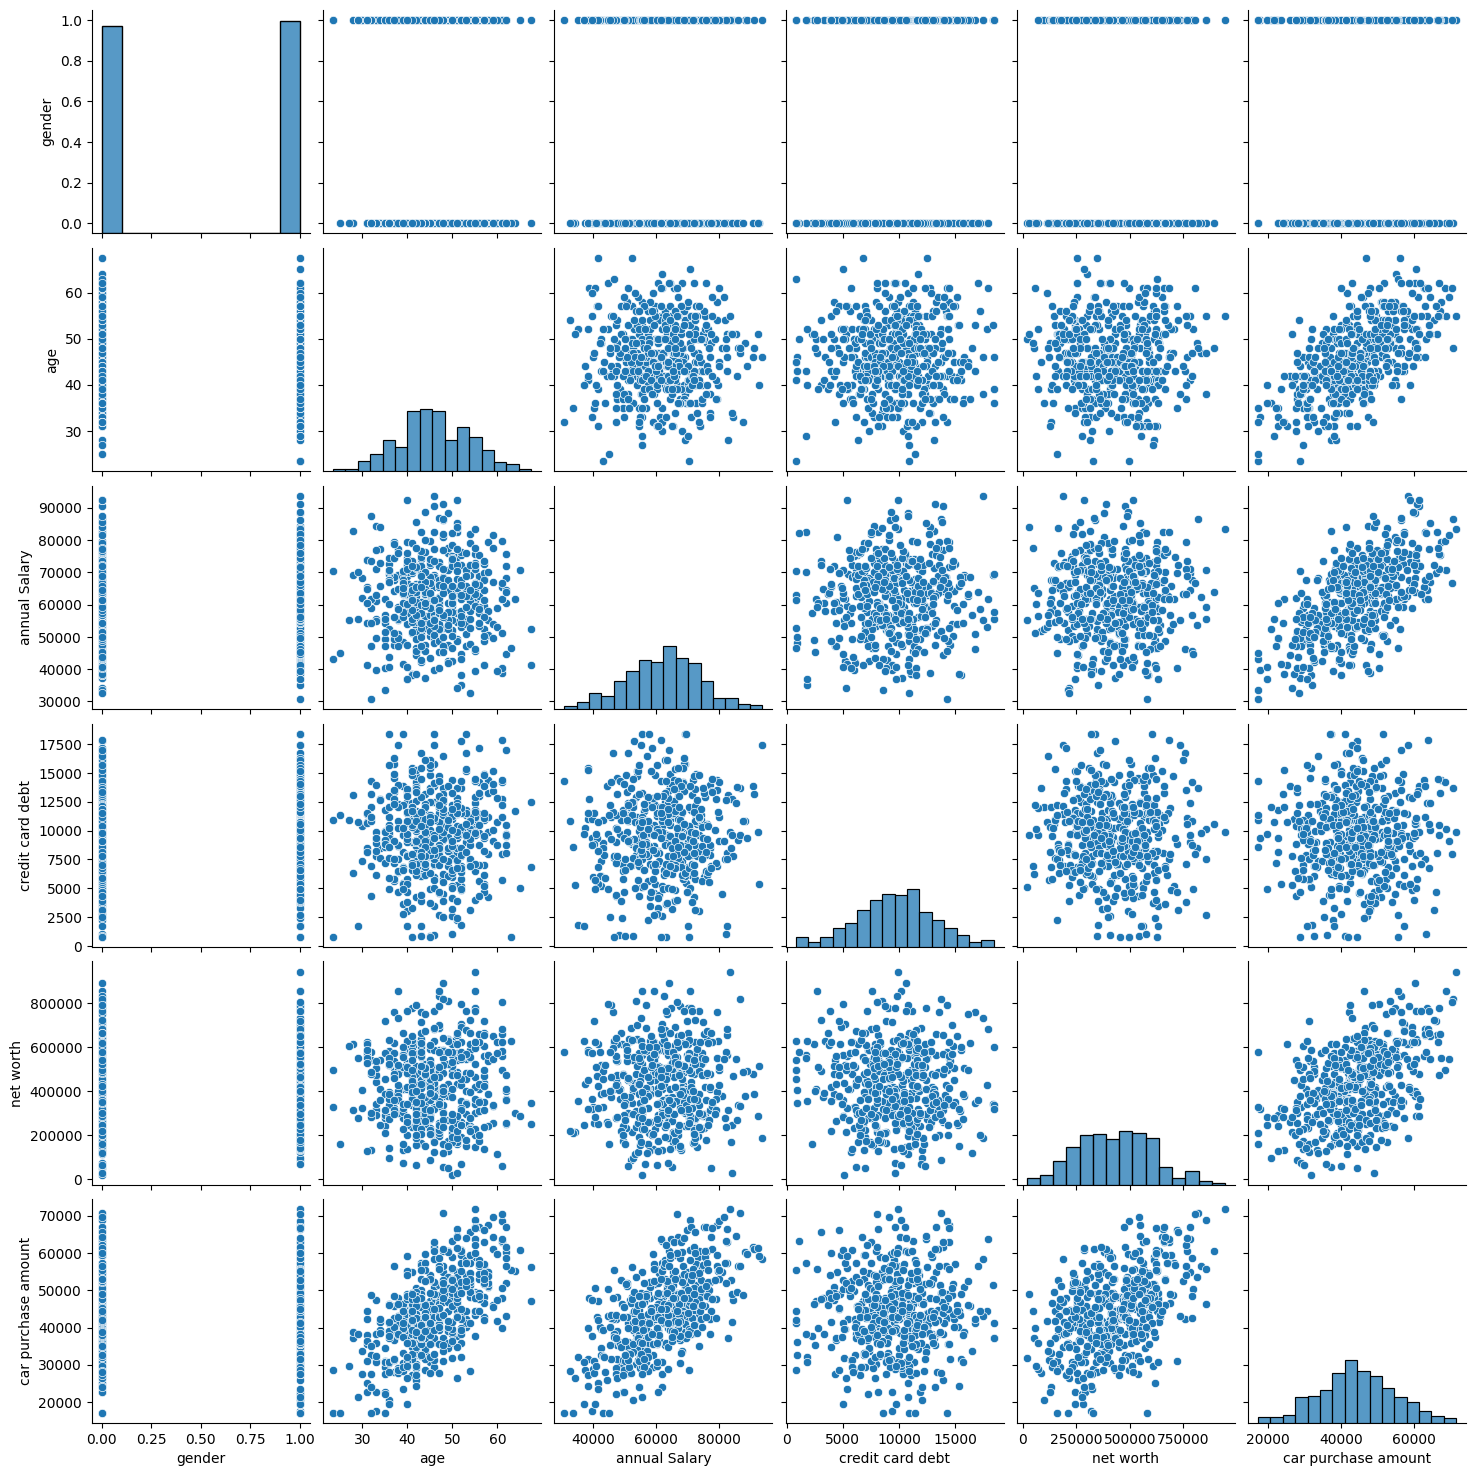

In [22]:
sns.pairplot(data = data)
plt.show()

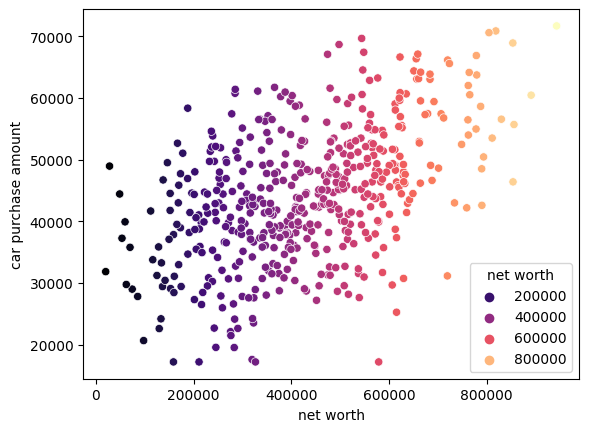

In [23]:
sns.scatterplot(data = data , x = "net worth" , y = "car purchase amount" , hue = "net worth" , palette = "magma")
plt.show()

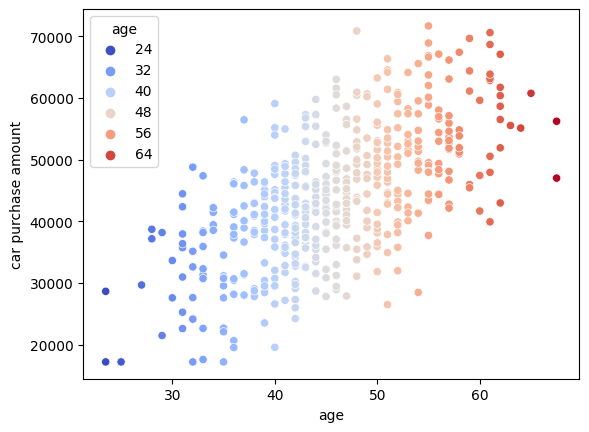

In [24]:
sns.scatterplot(data = data , x = "age" , y = "car purchase amount" , hue = "age" , palette = "coolwarm")
plt.show()

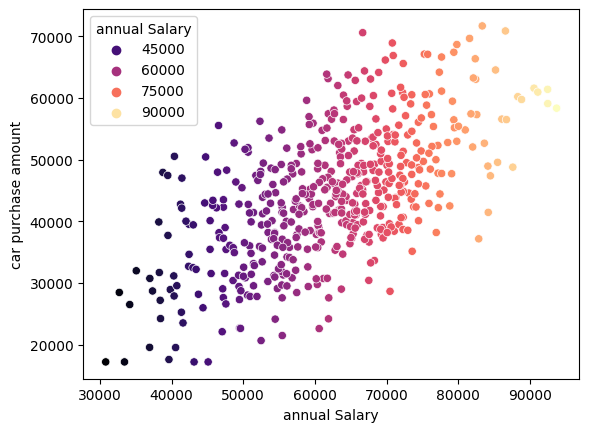

In [25]:
sns.scatterplot(data = data , x = "annual Salary" , y = "car purchase amount" , hue = "annual Salary" , palette = "magma")
plt.show()

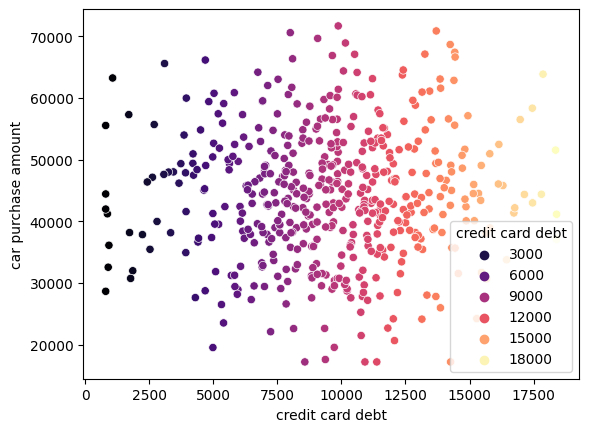

In [26]:
sns.scatterplot(data = data , x = "credit card debt" , y = "car purchase amount" , hue = "credit card debt" , palette = "magma")
plt.show()

<Axes: >

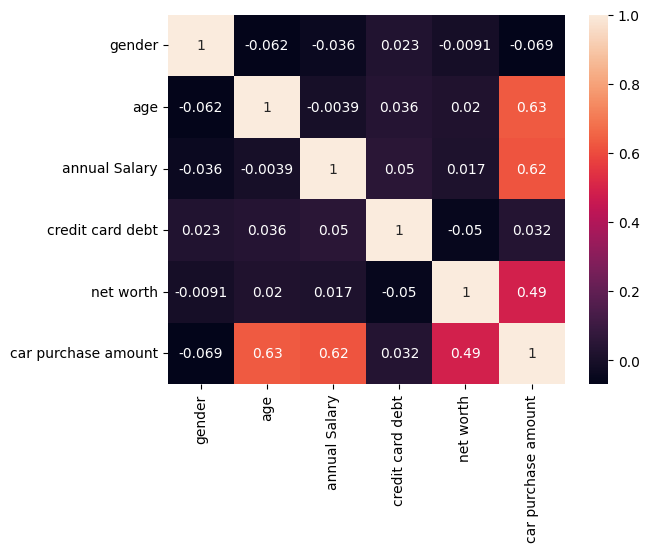

In [27]:
sns.heatmap(data.corr(numeric_only = True) , annot = True)

# Feature Scaling and Train Test Split

In [28]:
X = data.drop(columns = ["car purchase amount"] , axis = 1)
y = data["car purchase amount"]

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)
y = sc.fit_transform(y.values.reshape(-1,1))

In [30]:
X

array([[-1.01207287, -0.60242831,  0.05833226,  0.57933797, -1.11207719],
       [-1.01207287, -0.7285649 ,  0.38931982, -0.00888249,  0.57574969],
       [ 0.98807114, -0.35015515, -0.71964058,  0.44963697,  1.19705848],
       ...,
       [ 0.98807114,  0.91121067,  0.58282042,  0.2911312 ,  1.92570652],
       [ 0.98807114,  1.66803016, -1.06372683,  1.27363267, -0.54063737],
       [ 0.98807114,  0.02825459, -0.06607854, -0.06134209,  0.1825527 ]])

In [31]:
i =0
while i < 20:
    print(y[i])
    i = i +1 

[-0.84347884]
[0.0826297]
[-0.12443522]
[2.19192229]
[1.10385141]
[1.16971448]
[-1.44824924]
[0.30195319]
[0.35666749]
[-0.57228169]
[1.39982311]
[-0.18465917]
[-1.46958837]
[0.47441709]
[0.4981661]
[0.82980352]
[-0.22948821]
[-0.03214619]
[0.03709682]
[1.000978]


In [32]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 5)
(125, 5)
(375, 1)
(125, 1)


# Model Training

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(5, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

# Set up early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_error",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=10, epochs=200, callbacks=[early_stopping])


Epoch 1/200
29/29 [==============================] - 1s 7ms/step - loss: 1.2948 - mean_absolute_error: 0.8615 - val_loss: 1.3933 - val_mean_absolute_error: 0.9491
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 1.1452 - mean_absolute_error: 0.8117 - val_loss: 1.2331 - val_mean_absolute_error: 0.9023
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 1.0723 - mean_absolute_error: 0.7925 - val_loss: 1.1623 - val_mean_absolute_error: 0.8810
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 1.0349 - mean_absolute_error: 0.7816 - val_loss: 1.1336 - val_mean_absolute_error: 0.8699
Epoch 5/200
29/29 [==============================] - 0s 2ms/step - loss: 1.0035 - mean_absolute_error: 0.7703 - val_loss: 1.1163 - val_mean_absolute_error: 0.8633
Epoch 6/200
29/29 [==============================] - 0s 2ms/step - loss: 0.9892 - mean_absolute_error: 0.7640 - val_loss: 1.1070 - val_mean_absolute_error: 0.8604
Epoch 7/200
29/29 [===

29/29 [==============================] - 0s 2ms/step - loss: 0.3789 - mean_absolute_error: 0.4379 - val_loss: 0.5706 - val_mean_absolute_error: 0.5633
Epoch 52/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3705 - mean_absolute_error: 0.4314 - val_loss: 0.5577 - val_mean_absolute_error: 0.5587
Epoch 53/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3614 - mean_absolute_error: 0.4248 - val_loss: 0.5448 - val_mean_absolute_error: 0.5510
Epoch 54/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3532 - mean_absolute_error: 0.4190 - val_loss: 0.5286 - val_mean_absolute_error: 0.5424
Epoch 55/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3452 - mean_absolute_error: 0.4138 - val_loss: 0.5139 - val_mean_absolute_error: 0.5325
Epoch 56/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3368 - mean_absolute_error: 0.4070 - val_loss: 0.4974 - val_mean_absolute_error: 0.5218
Epoch 57/200
29/29 [=========

29/29 [==============================] - 0s 2ms/step - loss: 0.1072 - mean_absolute_error: 0.2029 - val_loss: 0.1664 - val_mean_absolute_error: 0.2604
Epoch 102/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1046 - mean_absolute_error: 0.1992 - val_loss: 0.1621 - val_mean_absolute_error: 0.2539
Epoch 103/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1027 - mean_absolute_error: 0.1970 - val_loss: 0.1588 - val_mean_absolute_error: 0.2524
Epoch 104/200
29/29 [==============================] - 0s 2ms/step - loss: 0.1008 - mean_absolute_error: 0.1956 - val_loss: 0.1552 - val_mean_absolute_error: 0.2487
Epoch 105/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0990 - mean_absolute_error: 0.1931 - val_loss: 0.1516 - val_mean_absolute_error: 0.2427
Epoch 106/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0967 - mean_absolute_error: 0.1904 - val_loss: 0.1478 - val_mean_absolute_error: 0.2400
Epoch 107/200
29/29 [===

Epoch 151/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0364 - mean_absolute_error: 0.1049 - val_loss: 0.0520 - val_mean_absolute_error: 0.1362
Epoch 152/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0355 - mean_absolute_error: 0.1032 - val_loss: 0.0508 - val_mean_absolute_error: 0.1345
Epoch 153/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0351 - mean_absolute_error: 0.1035 - val_loss: 0.0502 - val_mean_absolute_error: 0.1352
Epoch 154/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0344 - mean_absolute_error: 0.1018 - val_loss: 0.0491 - val_mean_absolute_error: 0.1325
Epoch 155/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0339 - mean_absolute_error: 0.1013 - val_loss: 0.0484 - val_mean_absolute_error: 0.1317
Epoch 156/200
29/29 [==============================] - 0s 2ms/step - loss: 0.0331 - mean_absolute_error: 0.0993 - val_loss: 0.0471 - val_mean_absolute_error: 0.1305
Epoch 157/

29/29 [==============================] - 0s 2ms/step - loss: 0.0146 - mean_absolute_error: 0.0609 - val_loss: 0.0207 - val_mean_absolute_error: 0.0870


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
print("Keys in the training history:", model.history.history.keys())

Keys in the training history: dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


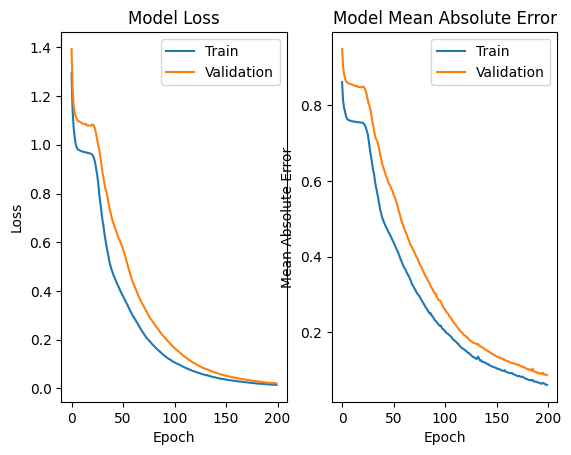

In [52]:
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history["loss"], label="Train")
plt.plot(model.history.history["val_loss"], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

# Plot mean absolute error
plt.subplot(1, 2, 2)
plt.plot(model.history.history["mean_absolute_error"], label="Train")
plt.plot(model.history.history['val_mean_absolute_error'], label="Validation")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.title("Model Mean Absolute Error")

plt.show()

In [54]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 997us/step


In [55]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.9830562566677264
